In [127]:
import pandas as pd
import numpy as np

In [128]:
import warnings
warnings.filterwarnings(action='ignore')

In [129]:
raw_train=pd.read_csv('re_train.csv')

In [130]:
raw_train=raw_train.drop('Unnamed: 0',axis=1)

In [131]:
train=pd.get_dummies(raw_train, columns = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'])

In [132]:
X=train.drop('credit',axis=1)
y =train.credit

In [133]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [134]:
from minisom import MiniSom

In [135]:
som = MiniSom(x=5 ,y=5 ,sigma=1.0 ,learning_rate=0.5 ,input_len=56)

In [136]:
som.random_weights_init(X) 

In [137]:
som.train_random(data=X ,num_iteration=100)

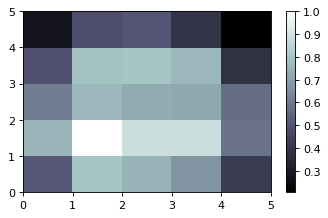

In [138]:
# 5*5 map 을 평면 위에 표현
# node 에 최근접한 data point 들이 많을수록 짙게, 적을수록 옅게 표시 (Map 의 진한 부분엔 데이터들이 모여있다는 뜻)
# Visualizing the results

from pylab import bone, pcolor, colorbar, plot, show
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3), dpi= 80, facecolor='w', edgecolor='k')

pcolor(som.distance_map().T)
colorbar()

In [139]:
som.distance_map()

array([[0.51279756, 0.75681298, 0.60928227, 0.49461575, 0.28013963],
       [0.79840147, 1.        , 0.7606558 , 0.78559653, 0.48050322],
       [0.74707334, 0.87924462, 0.72430209, 0.7914489 , 0.50500871],
       [0.66790694, 0.88196894, 0.71942238, 0.758637  , 0.39055797],
       [0.41262764, 0.57927964, 0.56981931, 0.38146363, 0.20691871]])

In [140]:
pd.DataFrame(som.distance_map())

,0,1,2,3,4
0,0.512798,0.756813,0.609282,0.494616,0.280140
1,0.798401,1.000000,0.760656,0.785597,0.480503
2,0.747073,0.879245,0.724302,0.791449,0.505009
3,0.667907,0.881969,0.719422,0.758637,0.390558
4,0.412628,0.579280,0.569819,0.381464,0.206919


In [141]:
mapping = som.win_map(X)

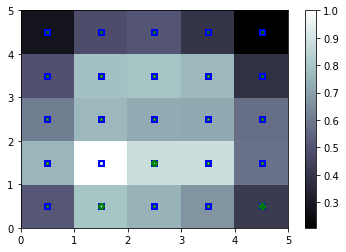

In [155]:
# Visualizing the results
## y값 표현 (신용도 낮으면 0, 높으면 1: y=0, 초록 동그라미 / y=1)

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ["g",'b']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 5,
         markeredgewidth = 2)
show()

In [144]:
# 각 좌표별 feature의 평균값
mean_list = []
index_list = []
for i in range(0, 5):
    for j in range(0, 5):
        mean_list.append(pd.DataFrame(mapping[0,0]).describe().loc['mean'])
        index_list.append('(' + str(i) + ',' + str(j) + ')' )

In [145]:
column_list=['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'family_size', 'begin_month',
       'gender_F', 'gender_M', 'car_N', 'car_Y', 'reality_N', 'reality_Y',
       'income_type_Commercial associate', 'income_type_Pensioner',
       'income_type_State servant', 'income_type_Student',
       'income_type_Working', 'edu_type_Academic degree',
       'edu_type_Higher education', 'edu_type_Incomplete higher',
       'edu_type_Lower secondary', 'edu_type_Secondary / secondary special',
       'family_type_Civil marriage', 'family_type_Married',
       'family_type_Separated', 'family_type_Single / not married',
       'family_type_Widow', 'house_type_Co-op apartment',
       'house_type_House / apartment', 'house_type_Municipal apartment',
       'house_type_Office apartment', 'house_type_Rented apartment',
       'house_type_With parents', 'occyp_type_Accountants',
       'occyp_type_Cleaning staff', 'occyp_type_Cooking staff',
       'occyp_type_Core staff', 'occyp_type_Drivers', 'occyp_type_HR staff',
       'occyp_type_High skill tech staff', 'occyp_type_IT staff',
       'occyp_type_Laborers', 'occyp_type_Low-skill Laborers',
       'occyp_type_Managers', 'occyp_type_Medicine staff', 'occyp_type_No',
       'occyp_type_Private service staff', 'occyp_type_Realty agents',
       'occyp_type_Sales staff', 'occyp_type_Secretaries',
       'occyp_type_Security staff', 'occyp_type_Unknown',
       'occyp_type_Waiters/barmen staff']

In [146]:
mean_df=pd.DataFrame(mean_list, index =index_list)
mean_df.columns = [column_list]

In [157]:
mean_1=pd.DataFrame(mapping[1,0])
mean_1.columns = [column_list]
mean_1.describe().loc['mean'].sort_values(ascending=False)

edu_type_Lower secondary                  9.982890
occyp_type_No                             0.561980
income_type_Pensioner                     0.561356
house_type_Municipal apartment            0.452704
DAYS_EMPLOYED                             0.346639
car_N                                     0.285583
occyp_type_Cleaning staff                 0.224094
reality_Y                                 0.148128
occyp_type_Laborers                       0.107974
family_type_Widow                         0.078105
house_type_Co-op apartment                0.061659
occyp_type_Medicine staff                 0.058257
occyp_type_Low-skill Laborers             0.056610
occyp_type_Unknown                        0.054739
income_type_Working                       0.047085
family_type_Married                       0.038408
gender_M                                  0.026041
house_type_With parents                   0.015033
house_type_Rented apartment               0.005546
income_type_Student            

In [158]:
mean_2=pd.DataFrame(mapping[4,0])
mean_2.columns = [column_list]
mean_2.describe().loc['mean'].sort_values(ascending=False)

occyp_type_Drivers                        3.961975
gender_M                                  1.301444
car_Y                                     0.799928
income_type_Working                       0.331383
family_type_Married                       0.287570
edu_type_Secondary / secondary special    0.273367
DAYS_BIRTH                                0.260618
family_size                               0.255074
income_total                              0.221126
house_type_With parents                   0.191132
child_num                                 0.173738
work_phone                                0.152505
reality_N                                 0.118876
income_type_Commercial associate          0.079869
DAYS_EMPLOYED                             0.079030
edu_type_Incomplete higher                0.036936
email                                    -0.006929
income_type_Student                      -0.012530
house_type_Rented apartment              -0.017581
edu_type_Academic degree       

In [159]:
mean_3=pd.DataFrame(mapping[2,1])
mean_3.columns = [column_list]
mean_3.describe().loc['mean'].sort_values(ascending=False)

occyp_type_Managers                       1.814203
edu_type_Higher education                 1.490947
occyp_type_Core staff                     0.877724
income_total                              0.670396
family_type_Married                       0.413571
DAYS_BIRTH                                0.379959
income_type_Commercial associate          0.322266
house_type_House / apartment              0.298595
income_type_State servant                 0.270873
phone                                     0.255535
work_phone                                0.236646
email                                     0.200691
family_size                               0.194337
gender_F                                  0.168219
house_type_Co-op apartment                0.153429
income_type_Student                       0.084219
reality_Y                                 0.072837
child_num                                 0.047153
occyp_type_HR staff                       0.044428
car_Y                          

In [101]:
result_df=raw_train[['income_total','occyp_type','child_num','income_type','car','gender','family_size',
                     'edu_type','credit']]                                                                                                  
result_df=pd.get_dummies(result_df, columns = ['gender','car','income_type','edu_type','occyp_type']) 


In [154]:
result_df.to_csv('som_df.csv')